# Klasifikasi Multikelas Menggunakan Random Forest Classifier
Kelompok 6
- Elisabeth Violina (IBDA 2021/212100693)
- Jessica Ong (IBDA 2020/202000204)
- Juan Christian Chandra (IBDA 2021/212100108)

### Masalah yang Dihadapi
Masalah yang ingin diselesaikan yaitu bagaimana memprediksi jika seorang nasabah akan bertahan di suatu bank atau tidak. Dalam hal ini akan dilakukan analisis terhadap data nasabah yang telah menjadi nasabah selama beberapa waktu untuk menentukan faktor-faktor yang mempengaruhi keputusan nasabah untuk tetap menjadi nasabah atau keluar dari bank.

### Data yang Dipilih

Data yang dipilih yaitu dataset __Churn Modelling__ dari kaggle.com yang berisi berbagai informasi dari nasabah bank yang masih aktif sebagai nasabah dari suatu bank dan nasabah-nasabah yang sudah keluar.

### Algoritma yang Digunakan
Algoritma yang digunakan yaitu Classification, karena untuk kasus churn modelling dibutuhkan algoritma untuk memprediksi apakah nasabah akan tetap menjadi nasabah atau keluar dari bank.


In [13]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Memuat Dataset

In [14]:
# load dataset
df = pd.read_csv('Churn_Modelling.csv')

# eksplorasi data
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

### Memilih Data-Data Yang Akan Digunakan

In [15]:
# memilih data-data yang akan digunakan
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

# Mengecek apakah data cukup seimbang
density = y.value_counts(normalize=True).reset_index()
print(density)

   index  Exited
0      0  0.7963
1      1  0.2037


Dari output tersebut dapat kita lihat bahwa nasabah yang keluar sebesar 20,37% dan nasabah yang tidak keluar sebesar 79,63%. Dengan kata lain, data ini tidak seimbang atau berat sebelah.

### Mengolah Data Non-Numerik Menjadi Data Numerik

In [16]:
# Mengubah data Geography dan Gender menjadi numerik
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

# menggabungkan data-data yang sudah di-preprocessing
X = pd.concat([X, geography, gender], axis=1)

# menghapus data yang sudah tidak diperlukan
X = X.drop(['Geography', 'Gender'], axis=1)

print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1   

### Mempersiapkan Data Latih dan Data Uji

In [17]:
# membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Melakukan Scaling Pada Data

In [18]:
# melakukan scaling pada data numerik
scaler = StandardScaler()
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

### Membangun Model Klasifikasi

In [19]:
# Define the classifier
classifier = RandomForestClassifier(random_state=0)

# Performing the model building
classifier.fit(X_train, y_train)

# melakukan prediksi pada data testing
y_pred = classifier.predict(X_test)

### Membuat Confusion Matrix

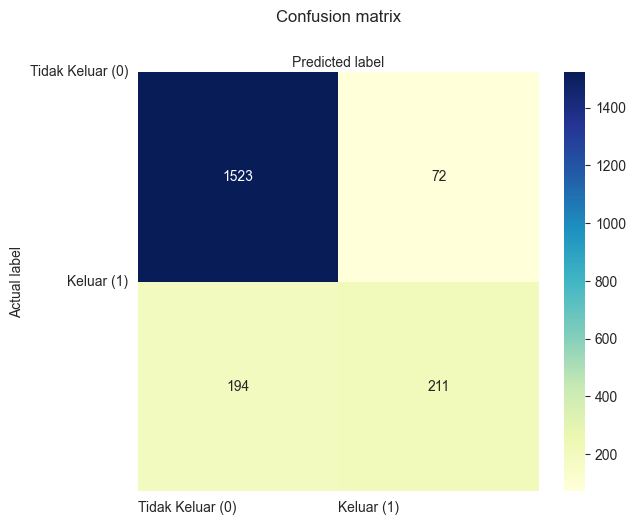

In [20]:
# Fungsi untuk menghitung confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
class_names= ["Tidak Keluar (0)", "Keluar (1)"]

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Menampilkan Ukuran Performansi Klasifikasi

In [21]:
print(f"Classification Report\n{classification_report(y_test, y_pred)}\n")

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.75      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000




### Kesimpulan

Berdasarkan hasil penggunaan algoritma random forest classifier untuk memprediksi apakah nasabah akan berhenti menggunakan jasa bank, didapatkan hasil yang cukup baik dengan akurasi sebesar 0.87. Dalam classification report, precision untuk kelas 0 (nasabah yang akan tetap berlangganan) adalah 0.89, sedangkan untuk kelas 1 (nasabah yang tidak lagi menggunakan jasa bank) adalah 0.75. Recall untuk kelas 0 adalah 0.95 dan kelas 1 adalah 0.52. F1-score untuk kelas 0 adalah 0.92 dan kelas 1 adalah 0.61. Dapat disimpulkan bahwa algoritma ini lebih baik dalam memprediksi nasabah yang akan tetap berlangganan dibandingkan dengan nasabah yang tidak lagi menggunakan jasa bank. Selain itu, meskipun akurasi cukup tinggi, recall untuk kelas 1 masih perlu ditingkatkan.

## Melakukan Prediksi Setelah Data Diseimbangkan

In [22]:
# import library yang dibutuhkan untuk menyeimbangkan data
from imblearn.over_sampling import SMOTE

### Menyeimbangkan Data

In [23]:
# menyeimbangkan data
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Mengecek apakah data sudah seimbang
density = y.value_counts(normalize=True).reset_index()
print(density)

   index  Exited
0      1     0.5
1      0     0.5


### Mempersiapkan Data Latih dan Data Uji

In [24]:
# membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Melakukan Scaling Pada Data

In [25]:
# melakukan scaling pada data numerik
scaler = StandardScaler()
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

### Membangun Model Klasifikasi

In [26]:
# Define the classifier
classifier = RandomForestClassifier(random_state=0)

# Performing the model building
classifier.fit(X_train, y_train)

# melakukan prediksi pada data testing
y_pred = classifier.predict(X_test)

### Membuat Confusion Matrix

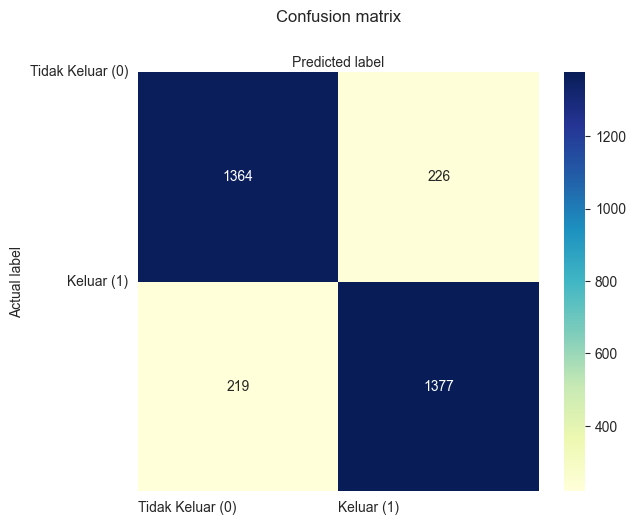

In [27]:
# Fungsi untuk menghitung confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
class_names= ["Tidak Keluar (0)", "Keluar (1)"]

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Menampilkan Ukuran Performansi Klasifikasi

In [28]:
print(f"Classification Report\n{classification_report(y_test, y_pred)}\n")

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1590
           1       0.86      0.86      0.86      1596

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186




### Kesimpulan Akhir

Dalam perbandingan hasil antara dua classification report, terlihat bahwa kedua algoritma memiliki akurasi yang relatif sama, yaitu sekitar 0.86 - 0.87. Namun, terdapat perbedaan pada precision, recall, dan f1-score pada masing-masing kelas.

Pada hasil pertama, algoritma random forest classifier memiliki precision yang lebih tinggi untuk kelas 0 (0.89) dibandingkan dengan kelas 1 (0.75). Namun, recall untuk kelas 1 (0.52) lebih rendah dibandingkan dengan kelas 0 (0.95). Sedangkan pada hasil kedua, algoritma memiliki precision, recall, dan f1-score yang hampir sama untuk kedua kelas.

Berdasarkan hasil tersebut, dapat disimpulkan bahwa algoritma random forest classifier pada hasil pertama lebih baik dalam memprediksi nasabah yang akan tetap berlangganan dibandingkan dengan nasabah yang tidak lagi menggunakan jasa bank. Namun, pada hasil kedua, algoritma memiliki performa yang lebih seimbang dalam memprediksi kedua kelas.

Lalu, secara data, dapat diketahui bahwa banyaknya nasabah yang diprediksi tidak keluar dari bank adalah sebanyak 1590 orang dan banyaknya nasabah yang diprediksi akan keluar dari bank adalah sebanyak 1596 orang. 

## Tambahan Perbandingan antara Logistic Regression dan Random Forest Classifier

In [29]:
#Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Select features and target
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

# Encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit logistic regression model to training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results and calculate accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Logistic Regression:", accuracy)


Accuracy Logistic Regression: 0.789


In [30]:
#Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('Churn_Modelling.csv')

# Select features and target
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

# Encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = ct.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit random forest classifier to training set
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Predict test set results and calculate accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Random Forest Classifier:", accuracy)


Accuracy Random Forest Classifier: 0.8655


### Kesimpulan Tambahan 
Algoritma yang menggunakan Logistic Regression memiliki akurasi yang lebih rendah jika dibandingkan dengan Random Forest Classifier. Oleh sebab itu, kami akhirnya lebih memilih Random Forest Classifier dibandinigkan Logistic Regression.

## Komitmen Integritas
Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun
menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain
daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal
maupun jawaban ujian kepada pihak lain.

### Link Github
https://github.com/kelompok6ai/uts